# Visualizaciónde Datos con Python y SQL

Se utilizaron las librerías **pandas**, **numpy**, **matplolib** y el driver **pyodbc** para enviar las consultas a SQL y generar los dataframe.

## 1. Conexión a SQL

In [41]:
#Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

#Definiendo parámetros
server = 'localhost'
database = 'DB_CURSOS'
username = 'sa'
password = '123456789'

## 2. Ingresos Totales por Módulo

In [42]:
#Script
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = """SELECT reg.modulos_id as 'CodModulo', mod.nombre as 'Modulo', COUNT(mat.id) as '# Matriculados', SUM(mat.monto_pago) as 'Ingresos'
FROM registro_modulos AS reg
INNER JOIN matriculas AS mat ON reg.id = mat.registro_modulos_id
INNER JOIN modulos AS mod ON reg.modulos_id = mod.id
GROUP BY reg.modulos_id,mod.nombre"""
df_modulos = pd.read_sql(query, cnxn)
df_modulos

,CodModulo,Modulo,# Matriculados,Ingresos
0,A0101,FUNDAMENTOS DE AUTOMATIZACIÓN INDUSTRIAL,20,5615.0
1,A0102,INSTRUMENTACIÓN INDUSTRIAL,23,6455.0
2,A0103,ELECTRONEUMÁTICA,32,8620.0
3,A0104,CONTROL DE PROCESOS EN PLC,47,12680.0
4,A0105,SOFTWARE SCADA (LAB VIEW),27,7495.0
5,A0106,REDES INDUSTRIALES,25,6920.0
6,A0107,BALANCE DE LÍNEA EN PROCESOS INDUSTRIALES,23,6360.0
7,A0201,DISEÑO MECÁNICO ASISTIDO POR COMPUTADORA (SOLI...,23,6360.0
8,A0202,CÓDIGO DE PROGRAMACIÓN EIA/ISO PARA TORNO CNC,28,7730.0
9,A0203,CÓDIGO DE PROGRAMACIÓN EIA/ISO PARA CENTRO DE ...,21,5715.0


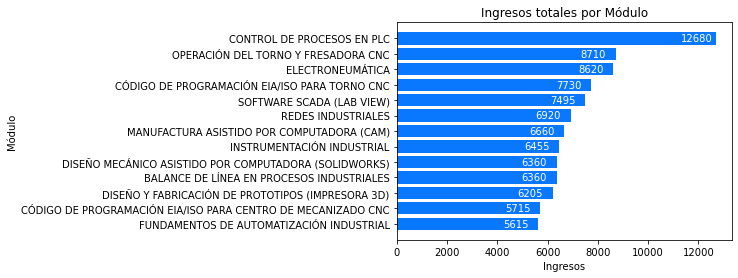

In [43]:
#parametros
nomModulo = df_modulos.sort_values('Ingresos', ascending=True)['Modulo']
values = df_modulos.sort_values('Ingresos', ascending=True)['Ingresos']

#etiquetas
fig, ax = plt.subplots()
bars = ax.barh(nomModulo, values)
ax.bar_label(bars, color = 'white' , label_type='edge', padding= -35.0)

#grafico
plt.barh(nomModulo,values, color ='#0978FF')
plt.title("Ingresos totales por Módulo")
plt.ylabel('Módulo')
plt.xlabel('Ingresos')
plt.show()

## 3. Evolución de ingresos por mes

In [44]:
#Script
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query2 = """SELECT 
      CASE  MONTH(reg.fecha_inicio)  
         WHEN 1 THEN 'Enero'  
         WHEN 2 THEN 'Febrero'  
         WHEN 3 THEN 'Marzo'
         WHEN 4 THEN 'Abril'
		 WHEN 5 THEN 'Mayo'
		 WHEN 6 THEN 'Junio'
		 WHEN 7 THEN 'Julio'
		 WHEN 8 THEN 'Agosto'
		 WHEN 9 THEN 'Setiembre'
		 WHEN 10 THEN 'Octubre'
		 WHEN 11 THEN 'Noviembre'
		 WHEN 12 THEN 'Diciembre'  
      END
AS 'Mes', SUM(mat.monto_pago) as 'Ingresos'
FROM registro_modulos AS reg
INNER JOIN matriculas AS mat ON reg.id = mat.registro_modulos_id
GROUP BY MONTH(reg.fecha_inicio)"""
df_ingresosMes = pd.read_sql(query2, cnxn)

In [45]:
df_ingresosMes

,Mes,Ingresos
0,Enero,6340.0
1,Febrero,6315.0
2,Marzo,8020.0
3,Abril,7240.0
4,Mayo,12015.0
5,Junio,15515.0
6,Julio,7625.0
7,Agosto,5995.0
8,Setiembre,7165.0
9,Octubre,12865.0


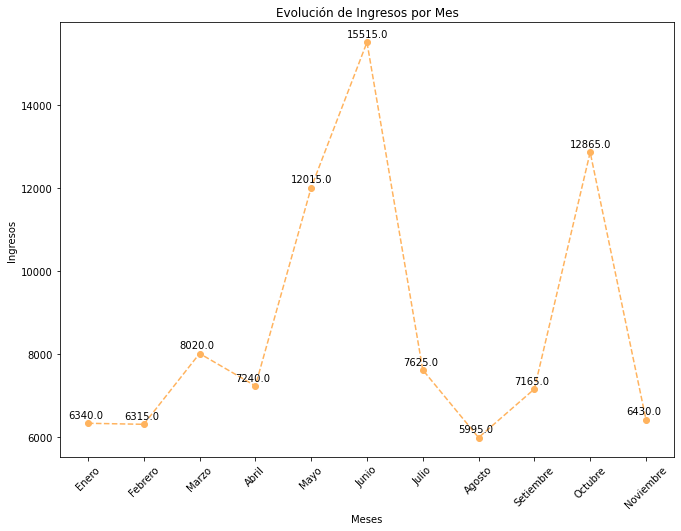

In [51]:
#Parametros
x = df_ingresosMes['Mes']
y = df_ingresosMes['Ingresos']

#Tamaño
fig, ax = plt.subplots(figsize=(11,8))

#Grafico
plt.plot(x, y, marker='o', linestyle='--', color='#FFB35E')
plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.title('Evolución de Ingresos por Mes')
plt.xticks(rotation=45)

#Etiquetas
for i, v in enumerate(y):
    ax.annotate(str(v), xy=(i,v), xytext=(-20,5), textcoords='offset points')

plt.show()

## 4. Total de estudiantes por Tipo de Pago

In [52]:
#Script
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query3 = """SELECT tp.nombre as 'Tipo de Pago', COUNT(mat.id) as 'Cantidad'
FROM tipo_pago as tp
INNER JOIN matriculas as mat ON tp.id = mat.tipo_pago_id
GROUP BY tp.nombre"""
df_totalTipoPago = pd.read_sql(query3, cnxn)

In [53]:
df_totalTipoPago

,Tipo de Pago,Cantidad
0,Estudiante FII,55
1,General,92
2,Pase Corporativo,201


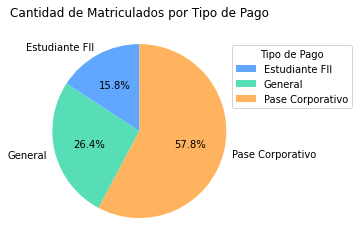

In [54]:
#Parametros
tipo = df_totalTipoPago['Tipo de Pago']
cantidad = df_totalTipoPago['Cantidad']

#Grafico
list_color_tipos=['#61A7FF','#57DEB6','#FFB35E']
plt.pie(cantidad, labels=tipo, startangle = 90, colors = list_color_tipos, autopct='%1.1f%%')

#Etiquetas y leyenda
plt.legend(title = 'Tipo de Pago', loc="center right",bbox_to_anchor=(1, 0.25, 0.5, 1))
plt.title('Cantidad de Matriculados por Tipo de Pago')
plt.show()